In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
# sys.path.insert(1, '/Users/masterai/Documents/ATCS/multilingual-interference/metalearning')

from naming_conventions import train_languages, train_languages_order_1, train_languages_order_2, train_languages_pairwise_1, train_languages_pairwise_2,

ModuleNotFoundError: No module named 'pandas'

In [119]:
test = np.asarray([
    np.asarray([np.zeros(3), np.ones(3), np.full(3,2)]).T,
    np.asarray([np.zeros(3), np.ones(3), np.full(3,2)]).T,
    np.asarray([np.zeros(3), np.ones(3), np.full(3,2)]).T,
    np.asarray([np.zeros(3), np.ones(3), np.full(3,2)]).T,
])
test, (test[:, [1,2,0], :])[:,:, [1,2,0]]  

(array([[[0., 1., 2.],
         [0., 1., 2.],
         [0., 1., 2.]],
 
        [[0., 1., 2.],
         [0., 1., 2.],
         [0., 1., 2.]],
 
        [[0., 1., 2.],
         [0., 1., 2.],
         [0., 1., 2.]],
 
        [[0., 1., 2.],
         [0., 1., 2.],
         [0., 1., 2.]]]),
 array([[[1., 2., 0.],
         [1., 2., 0.],
         [1., 2., 0.]],
 
        [[1., 2., 0.],
         [1., 2., 0.],
         [1., 2., 0.]],
 
        [[1., 2., 0.],
         [1., 2., 0.],
         [1., 2., 0.]],
 
        [[1., 2., 0.],
         [1., 2., 0.],
         [1., 2., 0.]]]))

In [184]:
def preprocess_from_path(path, order=0):

    idx_alignment = {
        0: [0,1,2,3,4,5,6], 
        1: [3,4,2,1,0,5,6], 
        2: [6,2,5,3,0,1,4]
    }[order]
    
    matrix = np.load(path)
    clipped = np.clip(matrix, a_min=-1.0, a_max=1.0)
    return (matrix[:, idx_alignment, :])[:,:, idx_alignment]  

def plot_it(matrix_1, 
            matrix_2, 
            episodes=[0,5,10], 
            lan_order=train_languages, 
            lineplots=False, 
            heatmaps=False,
            title_subplot_one="Order 1 (Similar)",
            title_subplot_two="Order 2 (Dissimilar)"
           ):
    
    plt.style.use('seaborn-whitegrid')
    matrix_1 = preprocess_from_path(path_1)
    matrix_2 = preprocess_from_path(path_2)
    
    if lineplots == True:
        
        for i, lan in enumerate(lan_order):
            
            fig, ax = plt.subplots(1,2, figsize=(17,8))
            fig.suptitle(f'{lan}: cosine similarity with the other languages over time', size=17)
        
            [sns.lineplot(x=episodes, y=matrix_1[episodes,i,_], label=lan_order[_], ax=ax[0]) for _ in range(7)]
            [sns.lineplot(x=episodes, y=matrix_2[episodes,i,_], label=lan_order[_], ax=ax[1]) for _ in range(7)]
            
            ax[0].set_title(title_subplot_one), ax[1].set_title(title_subplot_two)
            ax[0].set_xlim([0,max(episodes)]), ax[1].set_xlim([0,max(episodes)]), ax[0].set_ylim([-0.4,1]), ax[1].set_ylim([-0.4,1])
            plt.legend()
            plt.show()
        
    elif heatmaps == True:
            
        for episode in episodes:
            
            fig, ax = plt.subplots(1,2, figsize=(15,8))
            fig.suptitle(f'Cosine Similarities - Episode {episode}', size=17) 
            
            sns.heatmap(matrix_1[episode], annot=True, xticklabels=lan_order, yticklabels=lan_order, vmin=-0.2, vmax=0.8, ax=ax[0], center=0.0, cmap='coolwarm')
            sns.heatmap(matrix_2[episode], annot=True, xticklabels=lan_order, yticklabels=lan_order, vmin=-0.2, vmax=0.8, ax=ax[1], center=0.0, cmap='coolwarm')
            ax[0].set_title(title_subplot_one), ax[1].set_title(title_subplot_two)
            plt.show()

    else:
        print('Please set either lineplots or heatmaps to True')
        
    plt.close()

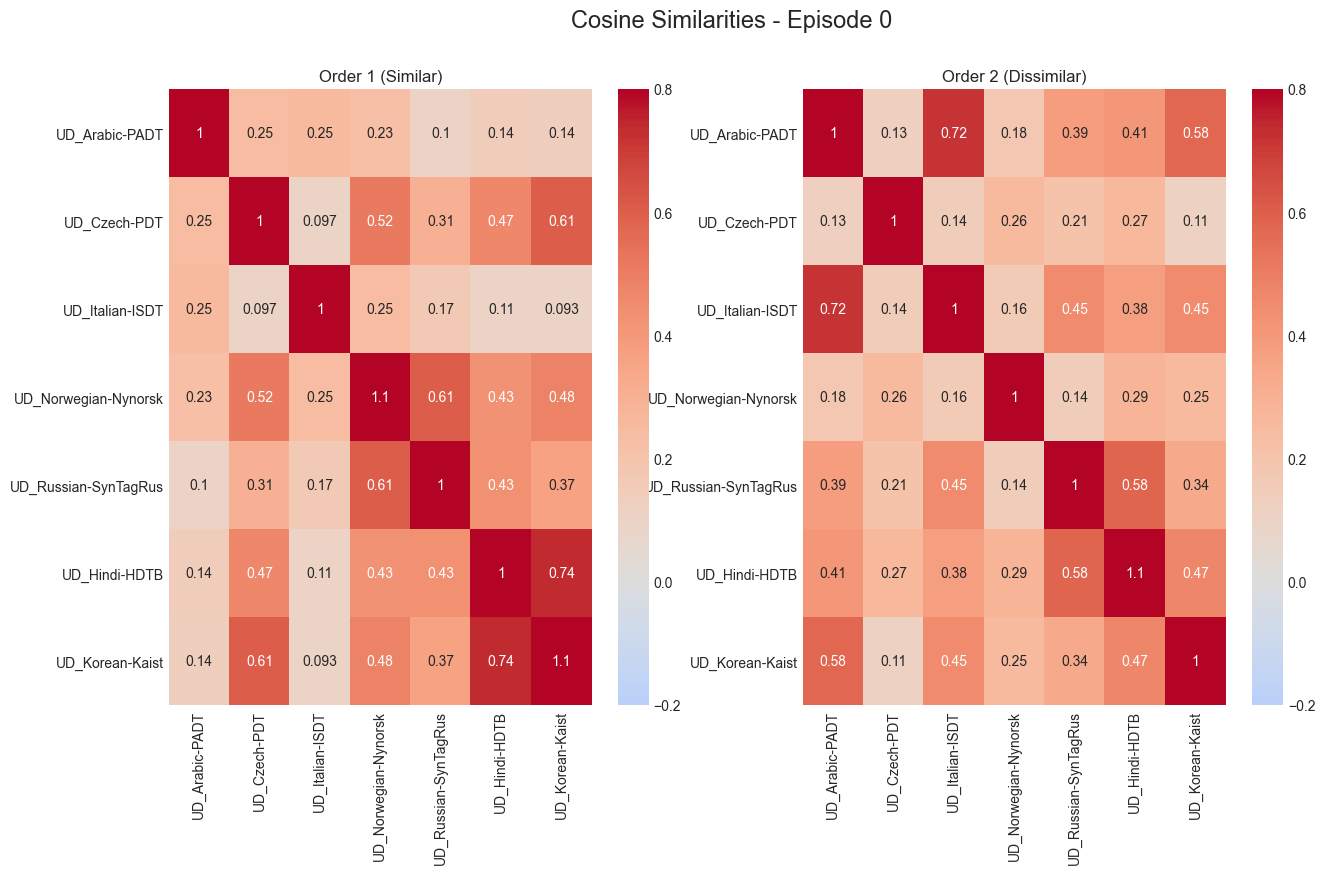

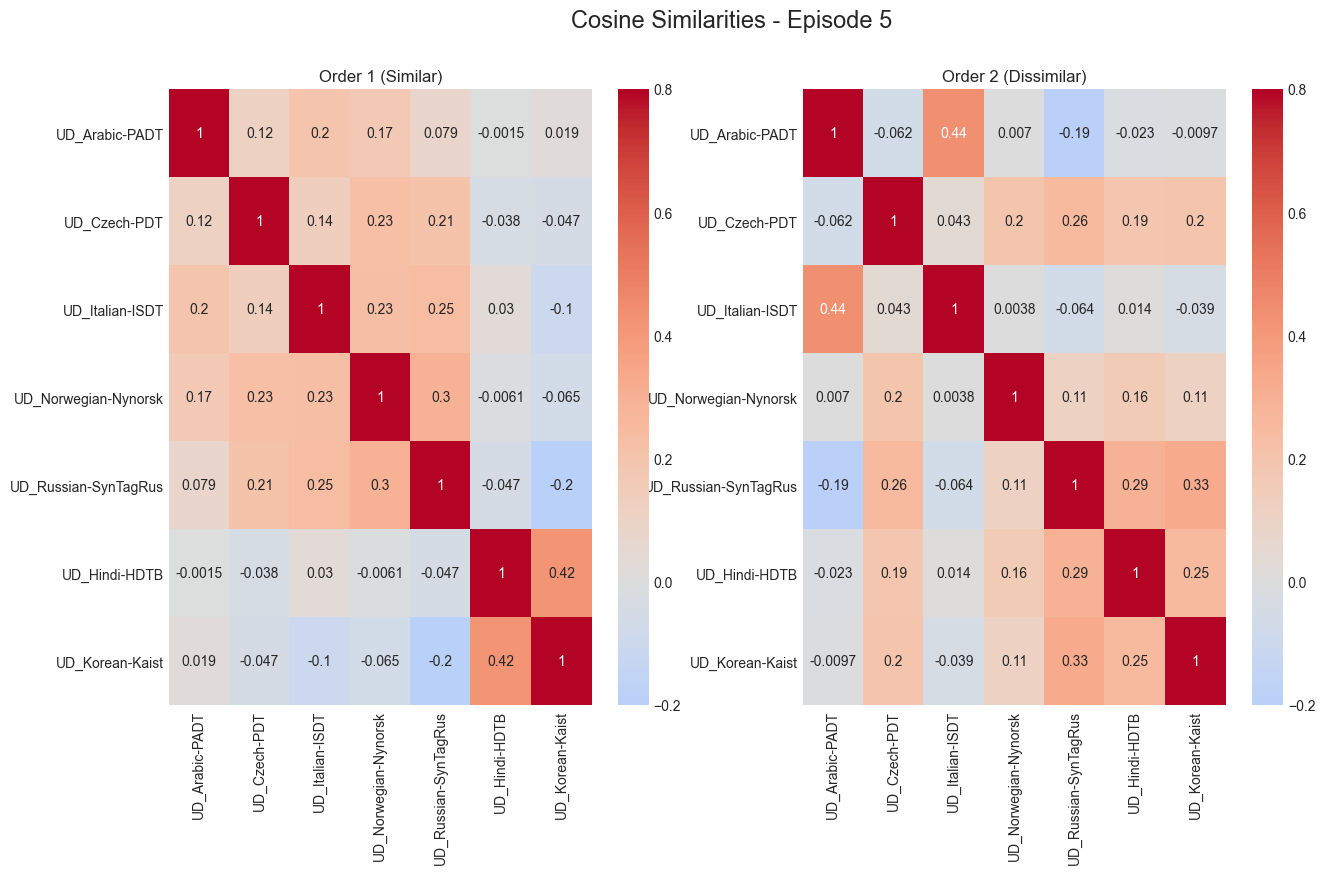

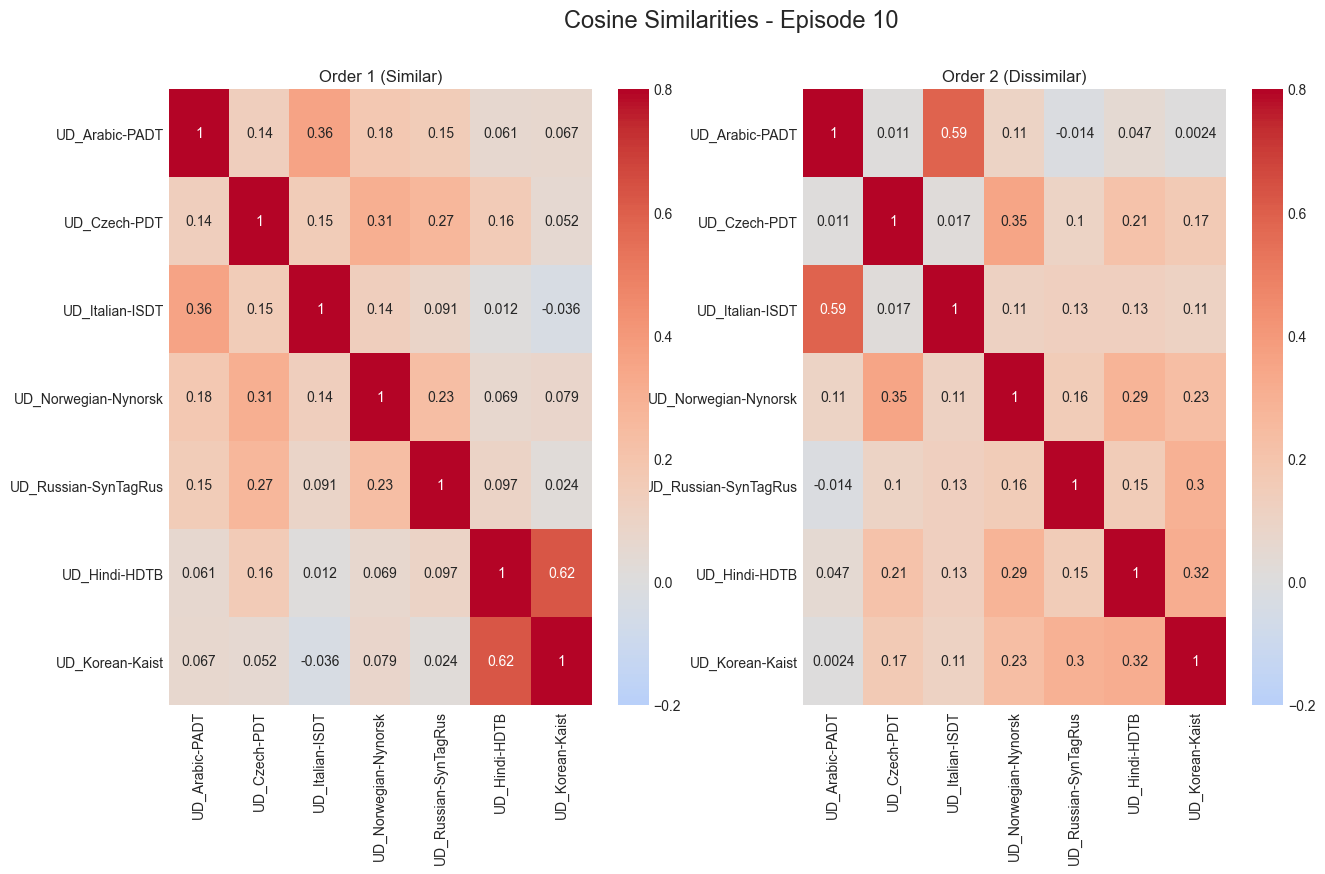

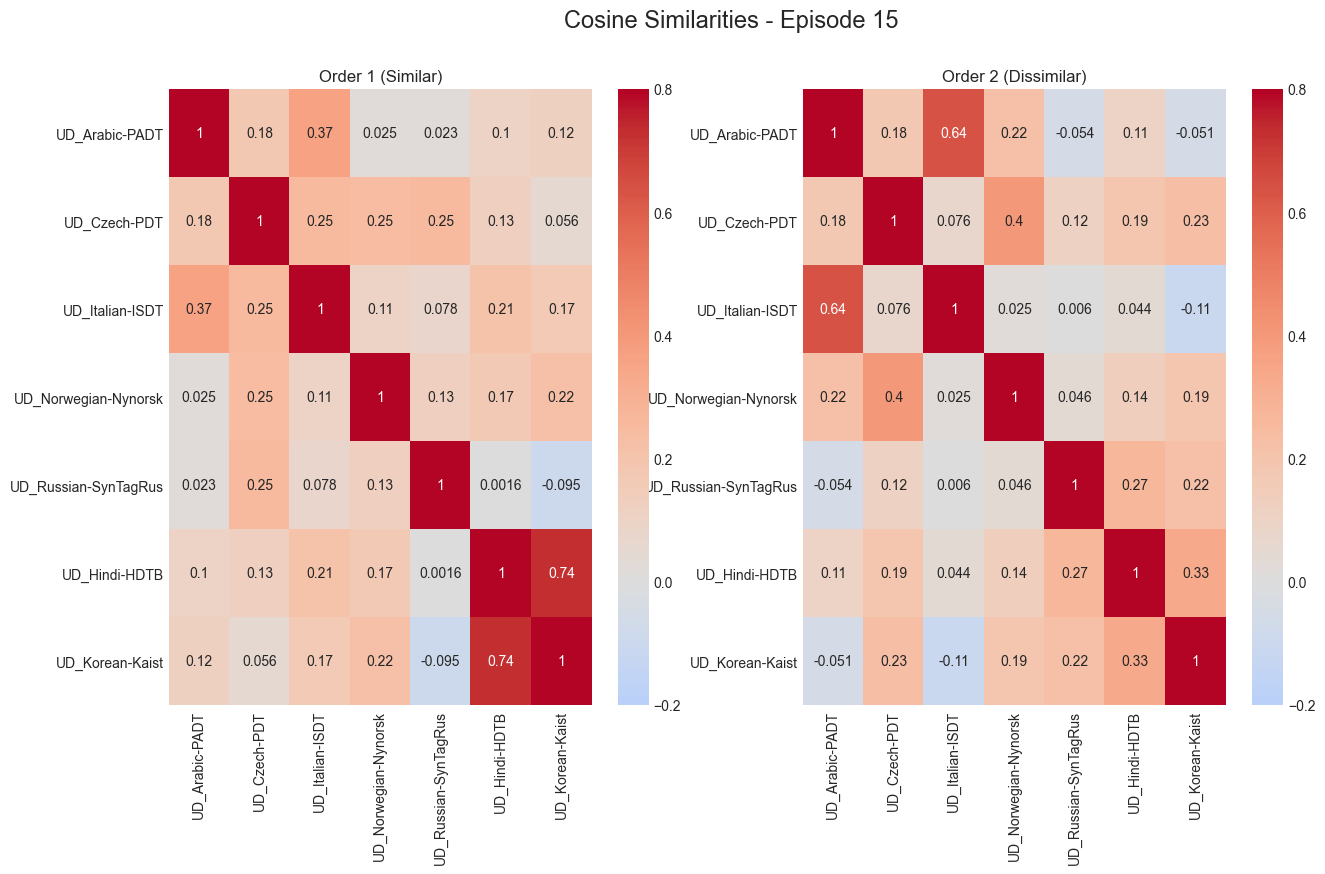

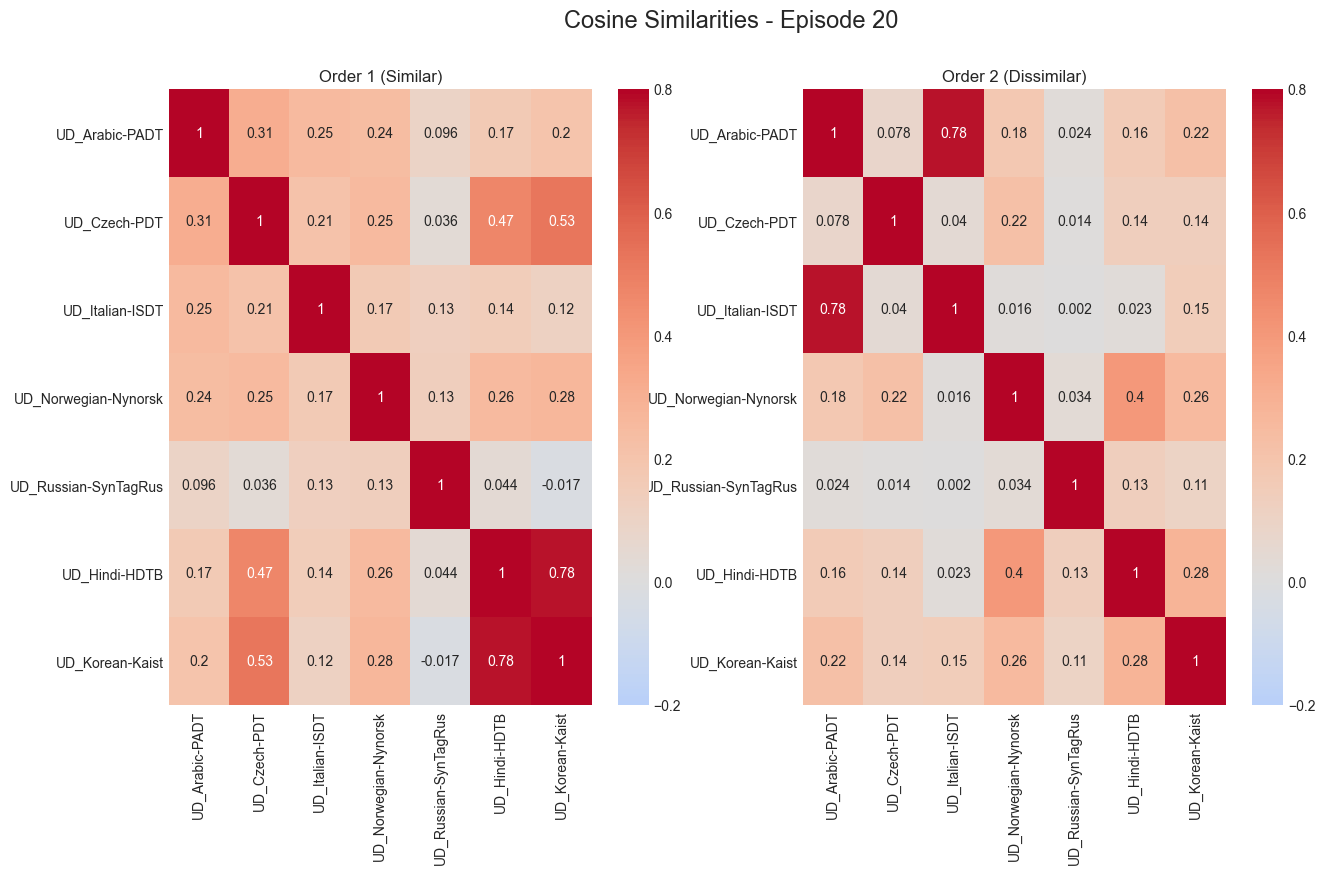

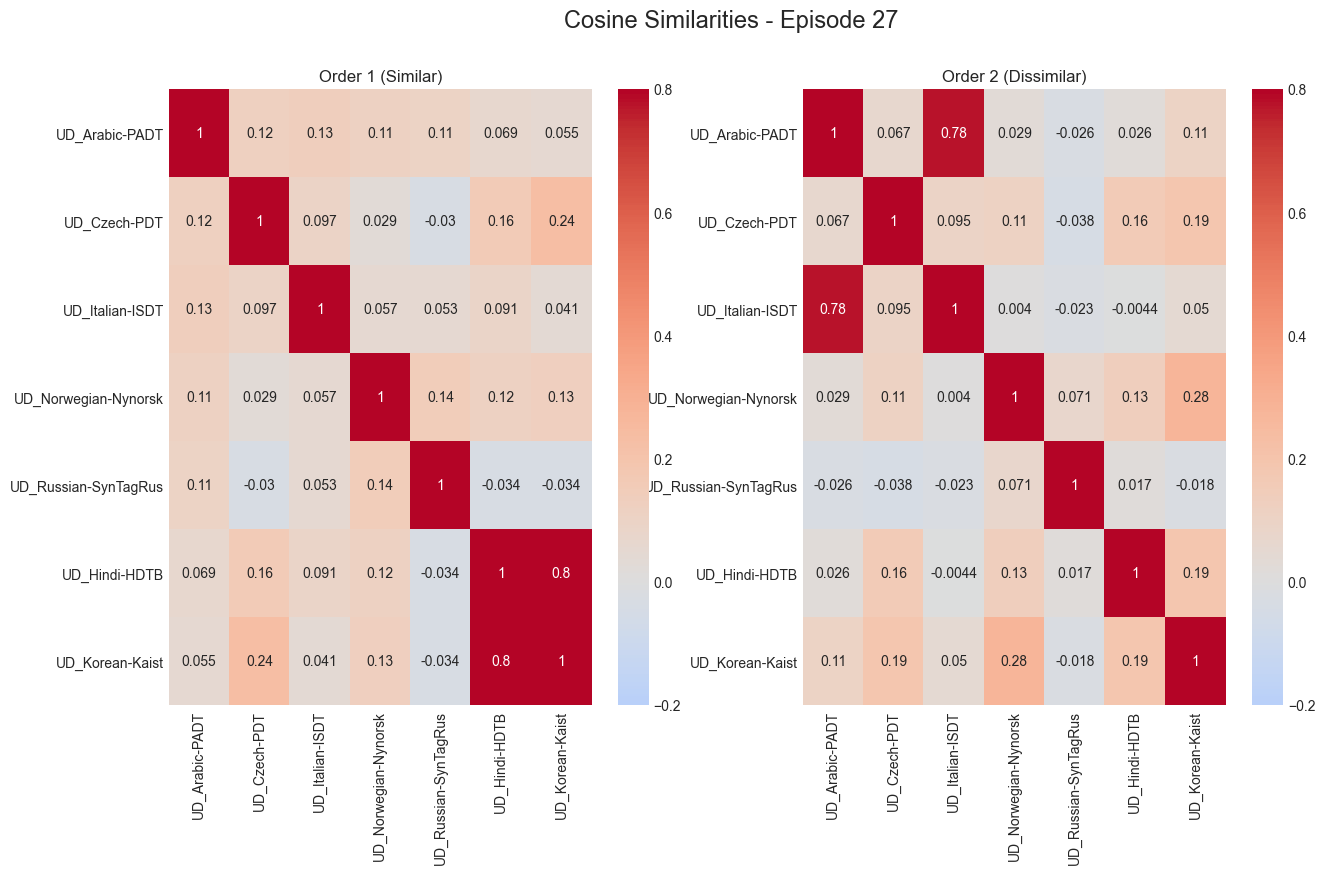

In [185]:
path_1 = '/Users/masterai/Desktop/temp_allGrads_episode_upd20_pretrain2021.05.18_15.18.52_suppSize20_order1_acc_modesum_cos_mat183.npy'
path_2 = '/Users/masterai/Desktop/temp_allGrads_episode_upd20_pretrain2021.05.18_15.18.52_suppSize20_order2_acc_modesum_cos_mat111.npy'

matrix_1 = preprocess_from_path(path_1, order=1)
matrix_2 = preprocess_from_path(path_2, order=2)
    
plot_it(matrix_1, matrix_2, episodes=[0,5,10,15,20,27], heatmaps=True, lineplots=False)

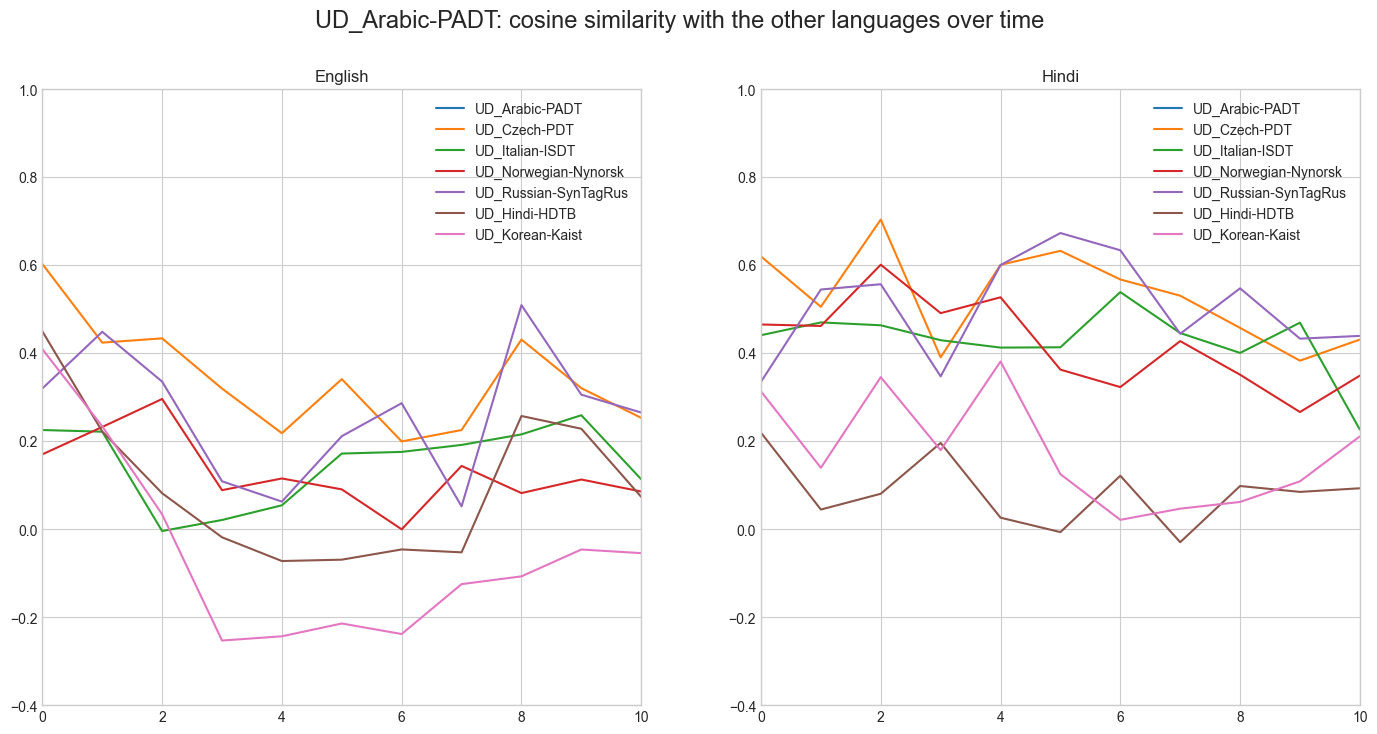

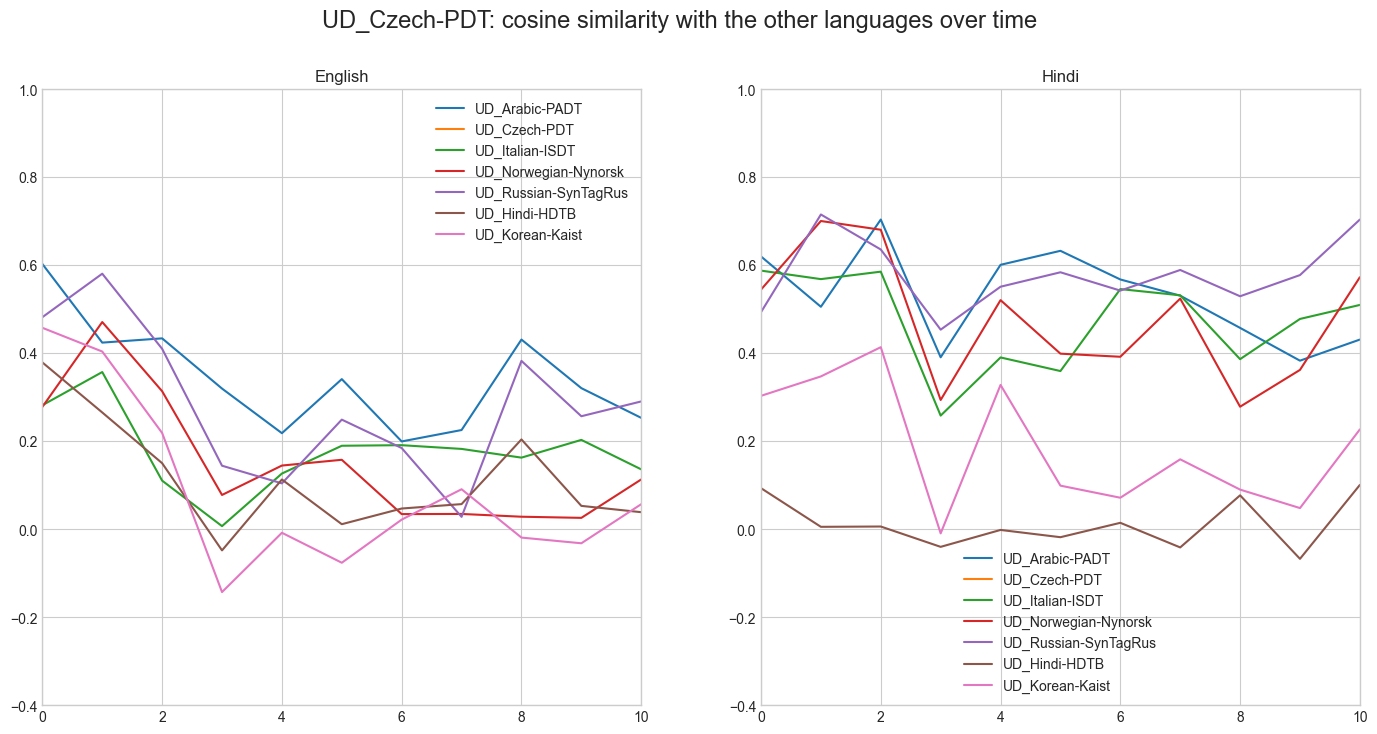

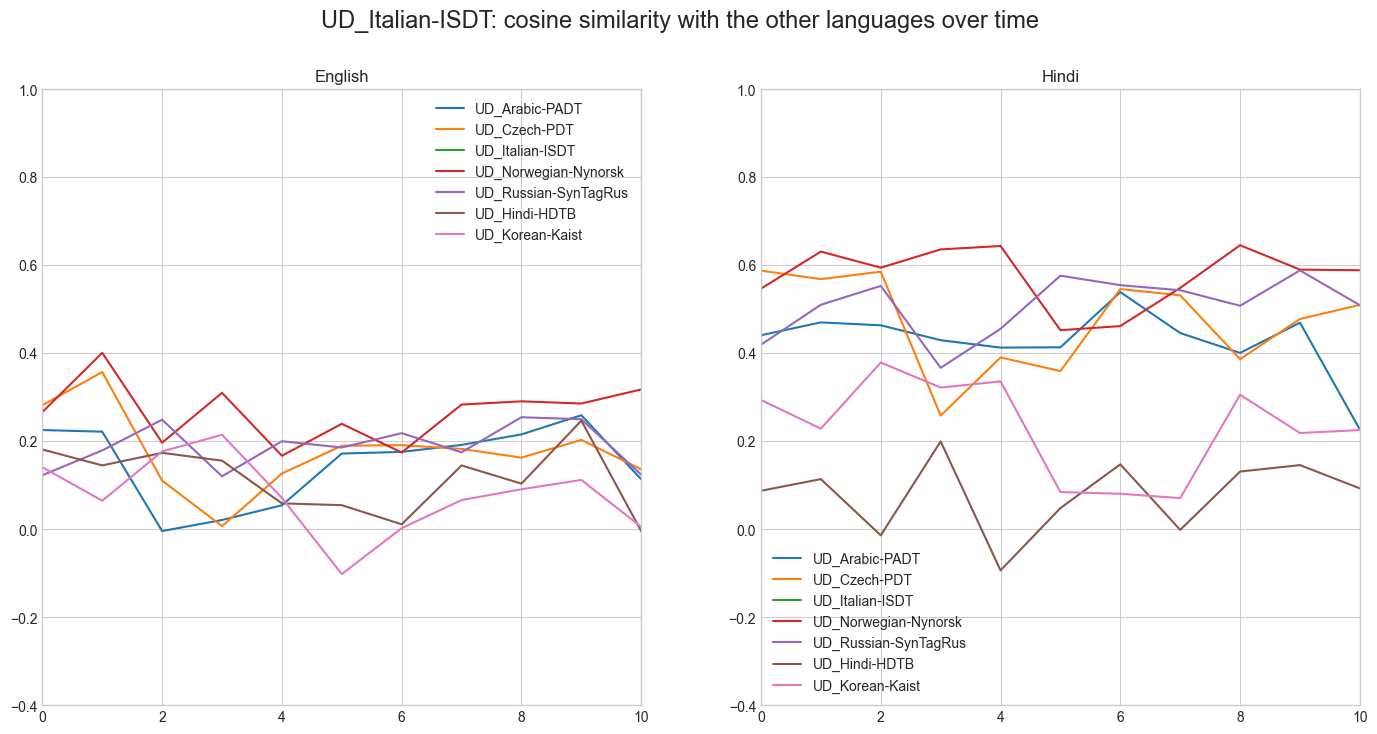

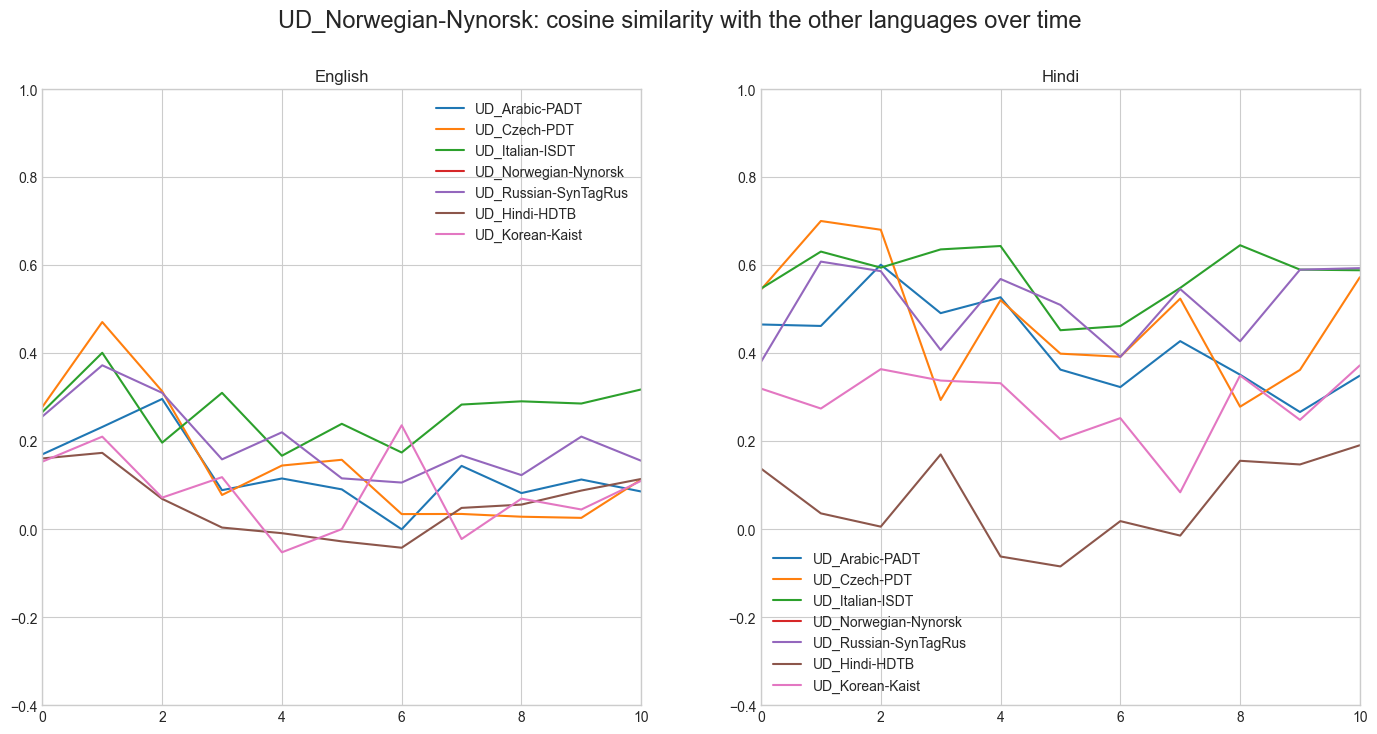

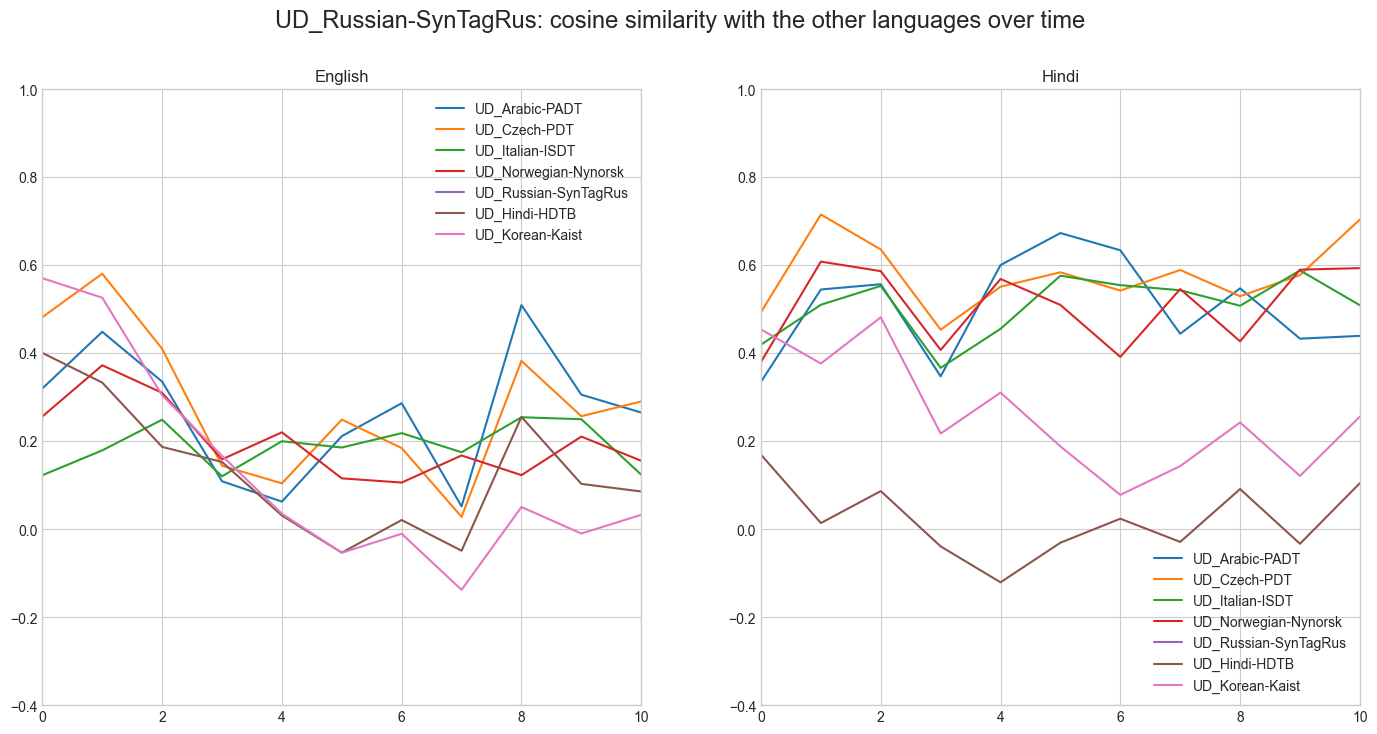

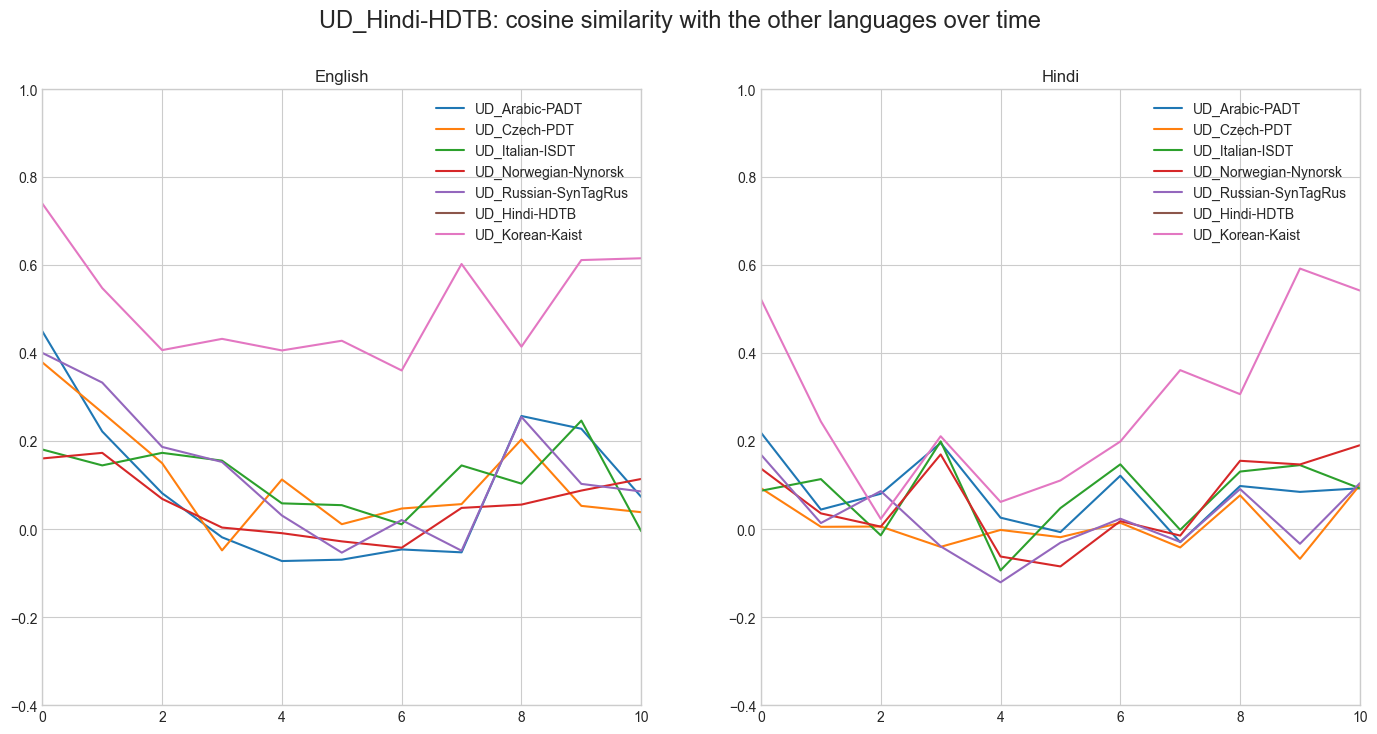

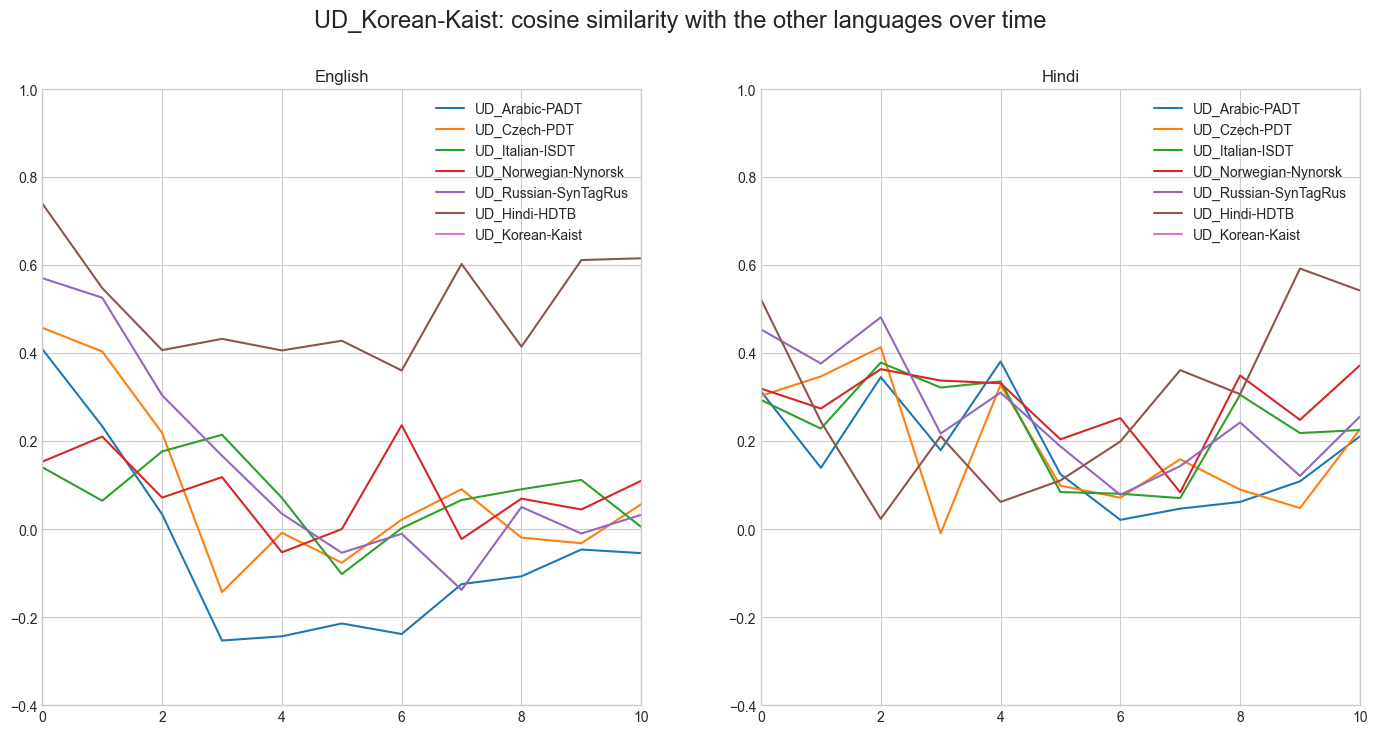

In [189]:
# Blaise

path_1 = '/Users/masterai/Downloads/TEMP_allGrads_episode_upd20_pretrainbert_finetune_en_suppSize20_order0_acc_modesum_cos_mat55.npy'
path_2 = '/Users/masterai/Downloads/TEMP_allGrads_episode_upd20_pretrainbert_finetune_hindi_suppSize20_order0_acc_modesum_cos_mat55.npy'

matrix_1 = preprocess_from_path(path_1, order=0)
matrix_2 = preprocess_from_path(path_2, order=0)
    
plot_it(matrix_1, matrix_2, episodes=[0,1,2,3,4,5,6,7,8,9,10], heatmaps=False, lineplots=True,
        title_subplot_one='English', title_subplot_two='Hindi')

# Language order

In [81]:
rel_to_eng = list(pd.DataFrame(zip(train_languages,[0.64,0.74,0.86,0.91,0.81,0.62,0.55])).sort_values(1, ascending=False)[0])
rel_to_eng

['UD_Norwegian-Nynorsk',
 'UD_Italian-ISDT',
 'UD_Russian-SynTagRus',
 'UD_Czech-PDT',
 'UD_Arabic-PADT',
 'UD_Hindi-HDTB',
 'UD_Korean-Kaist']

In [83]:
rel_to_eachother = ['UD_Norwegian-Nynorsk', 'UD_Russian-SynTagRus', 'UD_Italian-ISDT', 'UD_Czech-PDT', 'UD_Arabic-PADT', 'UD_Hindi-HDTB', 'UD_Korean-Kais']
rel_to_eachother

['UD_Norwegian-Nynorsk',
 'UD_Russian-SynTagRus',
 'UD_Italian-ISDT',
 'UD_Czech-PDT',
 'UD_Arabic-PADT',
 'UD_Hindi-HDTB',
 'UD_Korean-Kais']

In [87]:
neg_in_order_rel = ['UD_Korean-Kaist', 'UD_Italian-ISDT', 'UD_Hindi-HDTB', 'UD_Norwegian-Nynorsk', 'UD_Arabic-PADT',
                   'UD_Czech-PDT', 'UD_Russian-SynTagRus']

# # to korean
# 'UD_Norwegian-Nynorsk' = 0.61
# 'UD_Italian-ISDT' = 0.51
# 'UD_Russian-SynTagRus' = 0.62
# 'UD_Czech-PDT' = 0.53
# 'UD_Arabic-PADT' = 0.43
# 'UD_Hindi-HDTB' = 0.75

# # to italian
# 'UD_Norwegian-Nynorsk' = 0.82
# 'UD_Russian-SynTagRus' = 0.83
# 'UD_Czech-PDT' = 0.79
# 'UD_Arabic-PADT' = 0.76
# 'UD_Hindi-HDTB' = 0.64

# # to hindi
# 'UD_Norwegian-Nynorsk' = 0.64
# 'UD_Russian-SynTagRus' = 0.70
# 'UD_Czech-PDT' = 0.65
# 'UD_Arabic-PADT' = 0.66

# # to norwegian
# 'UD_Russian-SynTagRus' = 0.88
# 'UD_Czech-PDT' =  0.82
# 'UD_Arabic-PADT' = 0.69

# # to arabic
# 'UD_Russian-SynTagRus' = 0.74
# 'UD_Czech-PDT' =  0.65

# # to czech
# 'UD_Russian-SynTagRus' = 0.82

neg_in_order_rel


# 7667987 > order_1
# 7667996 > order_2

['UD_Korean-Kaist',
 'UD_Italian-ISDT',
 'UD_Hindi-HDTB',
 'UD_Norwegian-Nynorsk',
 'UD_Arabic-PADT',
 'UD_Czech-PDT',
 'UD_Russian-SynTagRus']

In [79]:
# to norwegian 

'UD_Italian-ISDT' = 0.82
'UD_Russian-SynTagRus' = 0.88
'UD_Czech-PDT' = 0.82
'UD_Arabic-PADT' = 0.69
'UD_Hindi-HDTB' = 0.67
'UD_Korean-Kais' = 0.61


# to russian 
 
'UD_Italian-ISDT' = 0.83
'UD_Czech-PDT' = 0.82
'UD_Arabic-PADT' = 0.74
'UD_Hindi-HDTB' = 0.70
'UD_Korean-Kais' = 0.62


# to italian

'UD_Czech-PDT' = 0.79
'UD_Arabic-PADT' = 0.76
'UD_Hindi-HDTB' = 0.64
'UD_Korean-Kais' = 0.51


# to czech

'UD_Arabic-PADT' = 0.65
'UD_Hindi-HDTB' = 0.65
'UD_Korean-Kais' = 0.53


# to arabic

'UD_Hindi-HDTB' = 0.66
'UD_Korean-Kais' = 0.43


# to hindi

'UD_Korean-Kais' = 0.43

3    UD_Norwegian-Nynorsk
2         UD_Italian-ISDT
4    UD_Russian-SynTagRus
1            UD_Czech-PDT
0          UD_Arabic-PADT
5           UD_Hindi-HDTB
6         UD_Korean-Kaist
Name: 0, dtype: object